In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics


In [83]:
gold_data = pd.read_csv("goldstock.csv")
gold_data.head()

,Unnamed: 0,Date,Close,Volume,Open,High,Low
0,0,2024-01-19,2029.3,166078.0,2027.4,2041.9,2022.2
1,1,2024-01-18,2021.6,167013.0,2009.1,2025.6,2007.7
2,2,2024-01-17,2006.5,245194.0,2031.7,2036.1,2004.6
3,3,2024-01-16,2030.2,277995.0,2053.4,2062.8,2027.6
4,4,2024-01-12,2051.6,250946.0,2033.2,2067.3,2033.1


In [63]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2511 entries, 0 to 2510
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2511 non-null   int64  
 1   Date        2511 non-null   object 
 2   Close       2511 non-null   float64
 3   Volume      2511 non-null   float64
 4   Open        2511 non-null   float64
 5   High        2511 non-null   float64
 6   Low         2511 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 137.4+ KB


In [64]:
gold_data.describe()

,Unnamed: 0,Close,Volume,Open,High,Low
count,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000
mean,1260.792911,1498.726085,185970.770609,1498.725528,1508.451454,1488.869932
std,729.262879,298.824811,97600.769382,299.118187,301.262244,296.417703
min,0.000000,1049.600000,1.000000,1051.500000,1062.700000,1045.400000
25%,630.500000,1249.850000,126693.500000,1249.500000,1257.300000,1242.350000
50%,1259.000000,1332.800000,175421.000000,1334.000000,1342.400000,1326.600000
75%,1888.500000,1805.850000,234832.000000,1805.600000,1815.450000,1793.050000
max,2532.000000,2093.100000,787217.000000,2094.400000,2098.200000,2074.600000


In [65]:
gold_data.isnull().sum()

Unnamed: 0    0
Date          0
Close         0
Volume        0
Open          0
High          0
Low           0
dtype: int64

In [84]:
gold_data.shape

(2511, 7)

In [85]:
gold_data = gold_data.rename(columns={'High':'price'})
gold_data

,Unnamed: 0,Date,Close,Volume,Open,price,Low
0,0,2024-01-19,2029.3,166078.0,2027.4,2041.9,2022.2
1,1,2024-01-18,2021.6,167013.0,2009.1,2025.6,2007.7
2,2,2024-01-17,2006.5,245194.0,2031.7,2036.1,2004.6
3,3,2024-01-16,2030.2,277995.0,2053.4,2062.8,2027.6
4,4,2024-01-12,2051.6,250946.0,2033.2,2067.3,2033.1
...,...,...,...,...,...,...,...
2506,2528,2014-01-28,1250.5,81426.0,1254.9,1261.9,1248.0
2507,2529,2014-01-27,1263.5,63419.0,1269.9,1280.1,1252.0
2508,2530,2014-01-24,1264.5,34998.0,1264.3,1273.2,1256.9
2509,2531,2014-01-23,1262.5,41697.0,1235.1,1267.1,1230.8


In [86]:
gold_data.drop("Unnamed: 0",axis=1,inplace=True)
gold_data

,Date,Close,Volume,Open,price,Low
0,2024-01-19,2029.3,166078.0,2027.4,2041.9,2022.2
1,2024-01-18,2021.6,167013.0,2009.1,2025.6,2007.7
2,2024-01-17,2006.5,245194.0,2031.7,2036.1,2004.6
3,2024-01-16,2030.2,277995.0,2053.4,2062.8,2027.6
4,2024-01-12,2051.6,250946.0,2033.2,2067.3,2033.1
...,...,...,...,...,...,...
2506,2014-01-28,1250.5,81426.0,1254.9,1261.9,1248.0
2507,2014-01-27,1263.5,63419.0,1269.9,1280.1,1252.0
2508,2014-01-24,1264.5,34998.0,1264.3,1273.2,1256.9
2509,2014-01-23,1262.5,41697.0,1235.1,1267.1,1230.8


# correlation
1.positive correlation 
2.negitive correlation

In [87]:
correlation = gold_data.corr()

C:\Users\khadeer\AppData\Local\Temp\ipykernel_7896\1828644926.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = gold_data.corr()


<Axes: >

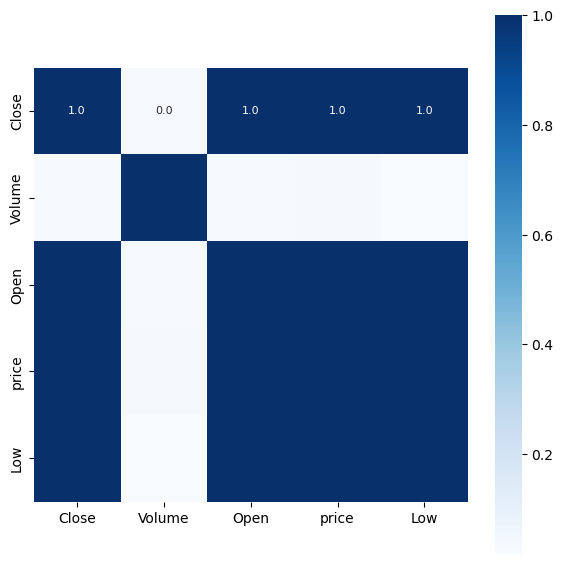

In [88]:
plt.figure(figsize=(7,7))
sns.heatmap(correlation,cbar=True,square=True,annot=True,fmt='.1f',annot_kws= {'size':8},cmap='Blues')

In [90]:
correlation['price']

Close     0.999524
Volume    0.030871
Open      0.999459
price     1.000000
Low       0.999251
Name: price, dtype: float64

C:\Users\khadeer\AppData\Local\Temp\ipykernel_7896\1456885902.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['price'],color='green')


<Axes: xlabel='price', ylabel='Density'>

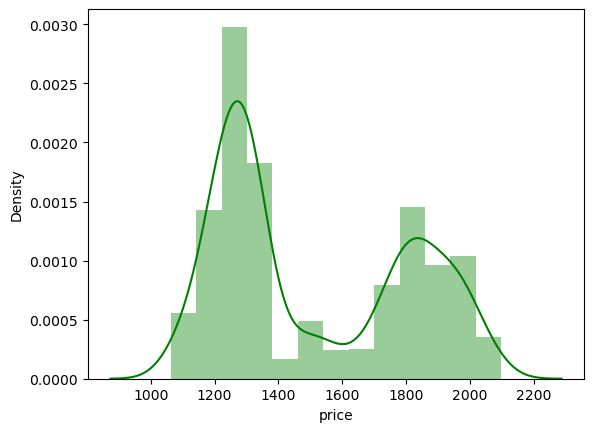

In [95]:
# checking the distribution of gold prices values
sns.distplot(gold_data['price'],color='green')

# splitting the Features and  target

In [96]:
x = gold_data.drop(['Date','price'],axis=1)
y = gold_data['price']

In [98]:
x_train , x_test ,y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=2) 

In [100]:
# x_train

In [102]:
# y_train

# model training and evalutauion

In [104]:
regressor = RandomForestRegressor(n_estimators=100)

In [106]:
regressor.fit(x_train,y_train)


RandomForestRegressor()

In [111]:
rand_forest_reg = regressor.predict(x_train)
rand_forest_reg

array([1777.15 , 1164.1  , 1302.835, ..., 1542.789, 1239.617, 1299.098])

In [112]:
# find the error r squared error

score_1 = metrics.r2_score(y_train,rand_forest_reg)
score_2 = metrics.mean_absolute_error(y_train,rand_forest_reg)
score_1,score_2

(0.9999260075745631, 1.5985856573705257)

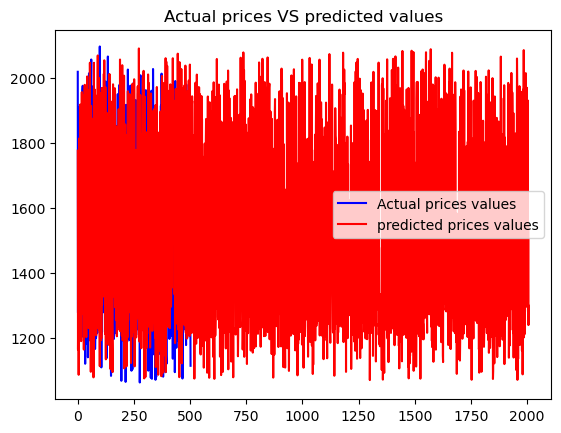

In [117]:
#visulaize the data for our convience
y_test = list(y_test)
plt.plot(y_test ,label='Actual prices values',color='blue')
plt.plot(rand_forest_reg ,label = 'predicted prices values',color='red')
plt.title('Actual prices VS predicted values')
plt.legend()
plt.show()